In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image


In [3]:
koi = pd.read_csv('koi_cumulative.csv',delimiter=',',comment='#')

In [4]:
single_planets = koi[(koi['koi_count'] == 1) & ((koi['koi_disposition'] == 'CANDIDATE') | ((koi['koi_disposition'] == 'CONFIRMED')))]

In [5]:
single_planets

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
10,11,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
11,12,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
12,13,6922244,K00010.01,Kepler-8 b,CONFIRMED,CANDIDATE,0.998,0,0,0,...,-137.0,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563
18,19,10526549,K00746.01,Kepler-660 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-146.0,4.583,0.065,-0.035,0.696,0.056,-0.068,288.13824,47.724449,15.302
19,20,10583066,K00747.01,Kepler-661 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-123.0,4.648,0.020,-0.056,0.672,0.062,-0.036,283.71088,47.863270,15.784
26,27,10682541,K00751.01,Kepler-663 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-159.0,4.552,0.034,-0.136,0.847,0.161,-0.069,297.80826,47.946671,15.861
27,28,11460018,K00769.01,Kepler-671 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-169.0,4.564,0.032,-0.168,0.831,0.207,-0.069,294.26581,49.314091,15.356
31,32,11507101,K00773.01,Kepler-672 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-74.0,4.369,0.121,-0.099,1.036,0.138,-0.124,291.72202,49.480869,15.172
34,35,10987985,K00758.01,Kepler-665 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-149.0,4.499,0.092,-0.115,0.826,0.091,-0.082,297.02563,48.478588,15.390


In [7]:
tce = pd.read_csv('q1_q17_dr25_tce.csv',delimiter=',',comment='#')

In [8]:
tce_snr = tce[tce['tce_model_snr'] > 10]

In [9]:
single_tce = tce_snr.merge(single_planets,on='kepid',how='right')

In [10]:
len(single_tce) - len(single_planets)

72

In [11]:
n_events = single_tce.groupby(by='kepid').size()

In [12]:
np.sort(n_events[n_events > 1])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4])

In [13]:
n_events = n_events[n_events > 1]

In [14]:
n_events.keys()

Int64Index([ 2307199,  3112129,  3757590,  3861595,  4055765,  4282390,
             4474462,  4570949,  4649305,  4743508,  5376836,  5780460,
             5780885,  5795648,  6185476,  6187341,  6349881,  6603756,
             6750902,  6941084,  6946681,  7051180,  7107567,  7174617,
             7199060,  7350067,  7532973,  7582691,  7832787,  7834712,
             7901948,  7954278,  7967100,  8081482,  8416523,  8439323,
             8525286,  8527297,  8813698,  9098590,  9111849,  9149789,
             9173014,  9214942,  9410930,  9533489,  9596187,  9655129,
             9705459,  9941662, 10002261, 10073672, 10232123, 10295951,
            10384962, 10666592, 10736489, 10904857, 11189127, 11391018,
            11517719, 12367464],
           dtype='int64', name='kepid')

In [15]:
single_tce[single_tce['kepid'] == 10666592]

,loc_rowid_x,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1656,29736.0,10666592,1.0,0.0,2.20473,4.702130e-08,132.383,0.000011,0.6221,0.002058,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.11,292.24728,47.969521,10.463
1657,29737.0,10666592,2.0,0.0,2.20473,3.819490e-06,133.486,0.000835,0.9001,0.091090,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.11,292.24728,47.969521,10.463
1658,29738.0,10666592,3.0,0.0,2.20522,2.599310e-05,131.979,0.016061,0.3549,7.410000,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.11,292.24728,47.969521,10.463
1659,29792.0,10666592,6.0,0.0,25.97570,4.667570e-04,132.034,0.012179,0.4733,7.297000,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.11,292.24728,47.969521,10.463


In [16]:
filter1 = [a in n_events.keys() for a in single_tce['kepid']]

In [17]:
sample = single_tce[filter1]
# interesting columns to show
columns_interest = ['kepid','tce_period','tce_time0bk','tce_duration','tce_model_snr','koi_period','koi_time0bk','koi_duration','koi_disposition','delta_period']
sample['tce_duration'] = sample['tce_duration']/24.0

sample['delta_period']= sample['tce_period'] - sample['koi_period']
sample[columns_interest].sort_values('delta_period')

/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,kepid,tce_period,tce_time0bk,tce_duration,tce_model_snr,koi_period,koi_time0bk,koi_duration,koi_disposition,delta_period
1258,9533489,1.190740,132.526,0.179458,10.30,197.145533,300.176978,2.11450,CANDIDATE,-195.954793
1271,9173014,8.000490,138.982,0.048125,10.39,151.778840,204.520900,2.61500,CANDIDATE,-143.778350
1269,9173014,20.619300,139.242,0.149208,13.67,151.778840,204.520900,2.61500,CANDIDATE,-131.159540
1270,9173014,26.954900,150.134,0.225333,20.34,151.778840,204.520900,2.61500,CANDIDATE,-124.823940
1051,8525286,0.692679,131.954,0.115917,10.43,113.059801,241.008993,19.03000,CANDIDATE,-112.367122
1052,8525286,2.557090,132.569,1.278750,17.23,113.059801,241.008993,19.03000,CANDIDATE,-110.502711
795,7199060,0.566791,131.646,0.233708,12.38,64.186226,191.656390,8.48500,CANDIDATE,-63.619435
620,6946681,0.586156,132.000,0.074292,11.35,48.952811,139.676828,1.66000,CANDIDATE,-48.366655
621,6946681,2.249110,132.921,0.976250,19.81,48.952811,139.676828,1.66000,CANDIDATE,-46.703701
190,4474462,1.624580,132.477,0.572083,10.34,12.857559,141.855970,4.83100,CANDIDATE,-11.232979


In [18]:
def run_row(tab,n):
    kepid = tab['kepid'].loc[n]
    period = tab['tce_period'].loc[n]
    t0 = tab['tce_time0bk'].loc[n]
    duration = tab['tce_duration'].loc[n]
    print(n,kepid,period,t0,duration)
    predict_planet(kepid,period,t0,duration,n=n)
    #Image(filename='kepler-'+str(kepid)+'.png') 

def predict_planet(kepid,period,t0,duration,n=None):
    if n is None:
        suffix = ''
    else:
        suffix = '_'+str(n)
    KEPLER_DATA_DIR="/home/idies/workspace/kepler/data/kepler/data"
    MODEL_DIR="/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/"
    outstr = 'bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global '+\
      ' --model_dir='+MODEL_DIR +\
      ' --kepler_data_dir='+KEPLER_DATA_DIR+ \
      ' --kepler_id='+str(kepid)+\
      ' --period='+str(period)+\
      ' --t0='+str(t0)+\
      ' --duration='+str(duration)+ \
      ' --output_image_file='+'"kepler-'+str(kepid)+suffix+'.png"'
    print(outstr)
    !{outstr}

In [22]:
run_row(sample,193)

193 4570949 1.54493 132.003 0.0585416666667
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=4570949 --period=1.54493 --t0=132.003 --duration=0.0585416666667 --output_image_file="kepler-4570949_193.png"
/home/idies/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours'

In [110]:
predict_planet(3861595,3.849372,157.526686,2.63200/24.0)

bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=3861595 --period=3.849372 --t0=0.10966666666666668 --duration=0.10966666666666668 --output_image_file="kepler-3861595.png"
/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps'

In [122]:
run_row(sample,334)

4743508 2.08608 133.415 0.09466666666666666
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=4743508 --period=2.08608 --t0=133.415 --duration=0.09466666666666666 --output_image_file="kepler-4743508.png"
/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours':

In [125]:
run_row(sample,1839)

11391018 30.3604 148.091 0.2517916666666667
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=11391018 --period=30.3604 --t0=148.091 --duration=0.2517916666666667 --output_image_file="kepler-11391018.png"
/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours'

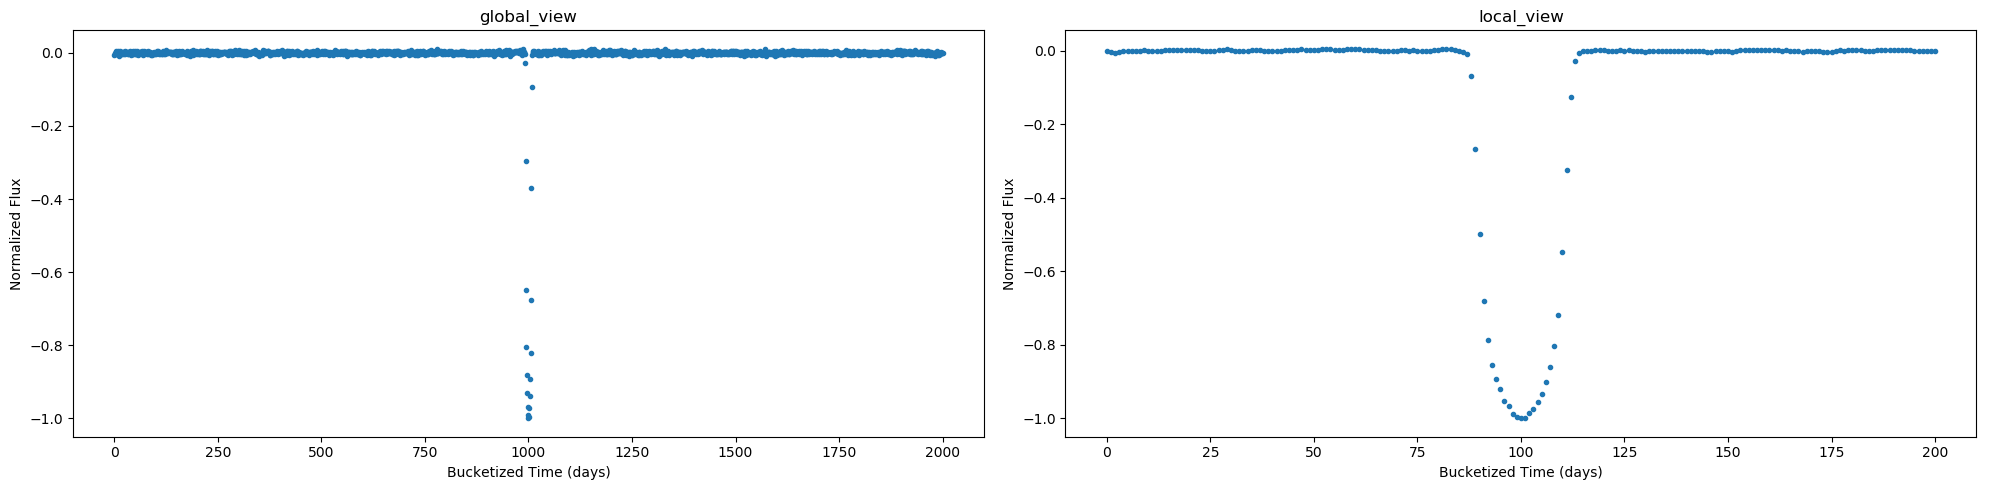

In [126]:
Image(filename='kepler-11391018.png')

In [129]:
run_row(sample,1675)

10736489 589.89 152.304 0.38387499999999997
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=10736489 --period=589.89 --t0=152.304 --duration=0.38387499999999997 --output_image_file="kepler-10736489.png"
/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours'

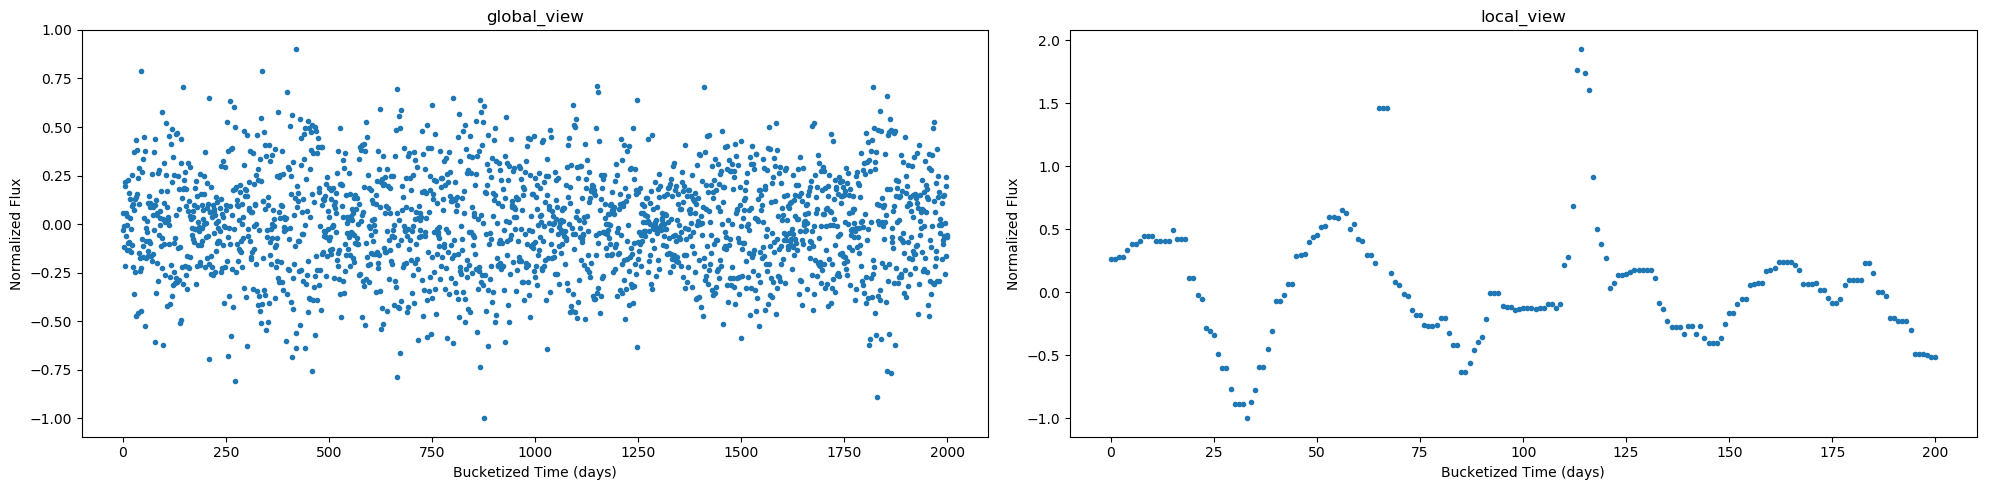

In [130]:
Image('kepler-10736489.png')

In [136]:
run_row(sample,1270)

9173014 26.9549 150.134 0.22533333333333336
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=9173014 --period=26.9549 --t0=150.134 --duration=0.22533333333333336 --output_image_file="kepler-9173014.png"
/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours':

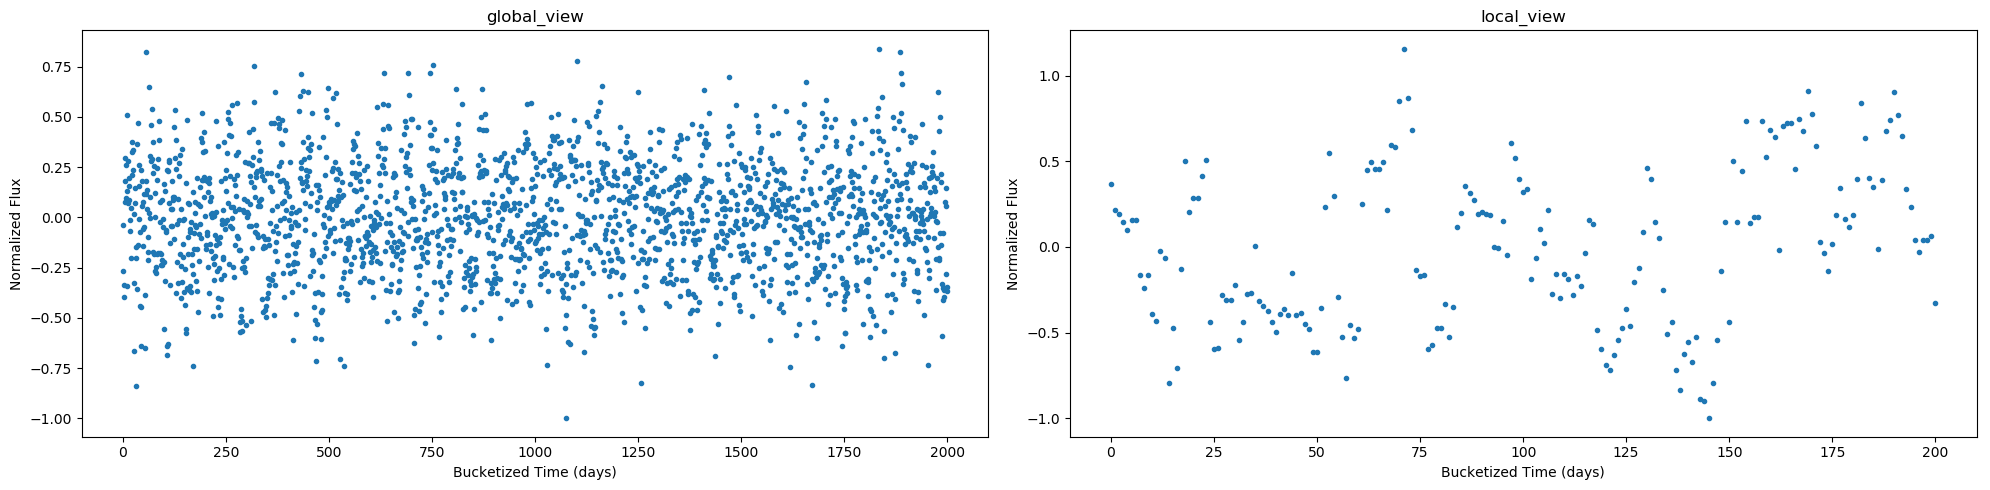

In [138]:
Image('kepler-9173014.png')

In [23]:
# run through all the rows
for ind in sample.index:
    run_row(sample,ind)

19 2307199 13.4472 132.831 0.130208333333
bazel-bin/astronet/predict --model=AstroCNNModel --config_name=local_global  --model_dir=/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/ --kepler_data_dir=/home/idies/workspace/kepler/data/kepler/data --kepler_id=2307199 --period=13.4472 --t0=132.831 --duration=0.130208333333 --output_image_file="kepler-2307199_19.png"
/home/idies/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/tdo/planets_ml/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10